## Project:
    
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank_Personal_Loan_Modelling-1.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). 
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [479]:
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
data.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [480]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [481]:
data.columns = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard']
data.head(3)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [482]:
data.shape

(5000, 14)

#### Dataset shape
Dataset has 5000 rows and 14 columns, with no missing values.

In [483]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [484]:
# null data 
data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [485]:
# Five point summary of numerical attributes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Information on the type of variable and min-max values:

###### ID: categorical, qualitative, nominal variable with lowest id being 0 and highest value of id being 5000.
###### Age: numerical, quantitative. discrete or continuous.
###### Experience: numerical (continuous), quantitative, interval (an experience of 0 means no experience). Min experience in the dataset being -3 (which seems to be an error made while recording) and max experience being 43
###### Income: numerical (continuous), quantitative, interval (an income of 0 means no income). Min income in the dataset being 8,000 dollars while the maximum income being 224,000 dollars.experience in the dataset being -3 (which seems to be an error made while recording) and max experience being 43
###### ZIPCode: categorical , qualitative, nominal.
###### Family: categorical, qualitative, ordinal. Lowest family size being 1 and max being 4.
###### CCAvg: numerical (continuous), quantitative, interval. Min average spending on credit cards per month being zero dollars and maximum being 10,000 dollars.
###### Education: categorical, qualitative, ordinal. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
###### Mortgage: numerical (continuous), quantitative, interval. Min mortage value in the dataset being zero dollars, which means there was no house mortage, and maximum value being 635,000 dollars.
###### PersonalLoan: also the target variable. categorical (binary), qualitative, nominal. If the customer accepted the personal loan offered in the last campaign then 1 else 0.
###### SecuritiesAccount: categorical (binary), qualitative, nominal. If the customer has a securities account with the bank then 1 else 0.
###### CDAccount: categorical (binary), qualitatitve, nominal. If the customer has a certificate of deposit (CD) account with the bank then 1 else 0.
###### Online: categorical (binary), qualitative, nominal. If the customer uses internet banking facilities then 1 else 0.
###### CreditCard: categorical (binary), qualitative, nominal. If the customer uses credit card issued by Bank then 1 else 0.

## Descriptive Statistics for the numerical variables
Descriptive statistics for the numerical variables (Age, Experience, Income, CCAvg, Mortgage)

###### Age: Range of Q1 to Q3 is between 35 to 55. Since the mean is almost similar to median, we can say that Age is normally distributed.
###### Experience: Range of Q1 to Q3 is between 20 to 30. Since the mean is almost similar to median, we can say that Experience is normally distributed. However, as mentioned above also, there are some recording errors in experience. We can either remove these rows (values) or else impute those to mean/median values.
###### Income: Range of Q1 to Q3 is between 39 to 98. Since mean is greater than median, we can say that Income is right (positively) skewed.
###### CCAvg: Range of Q1 to Q3 is between 0.70 to 2.50. Since mean is greater than median, we can say that CCAvg is right (positively) skewed.
###### Mortgage: 75% of data values are around 101,000 dollars whereas the maximum value being 635,000 dollars. Mortage is highly skewed towards right.

In [486]:
# Checking the distribution of target variable
display(data['PersonalLoan'].value_counts())

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [487]:
display(data['PersonalLoan'].value_counts(normalize = True)*100)

0    90.4
1     9.6
Name: PersonalLoan, dtype: float64

###### Total 5,000 customers, only 480 (~9.6%) accepted the personal loan that was offered to them in the earlier campaign

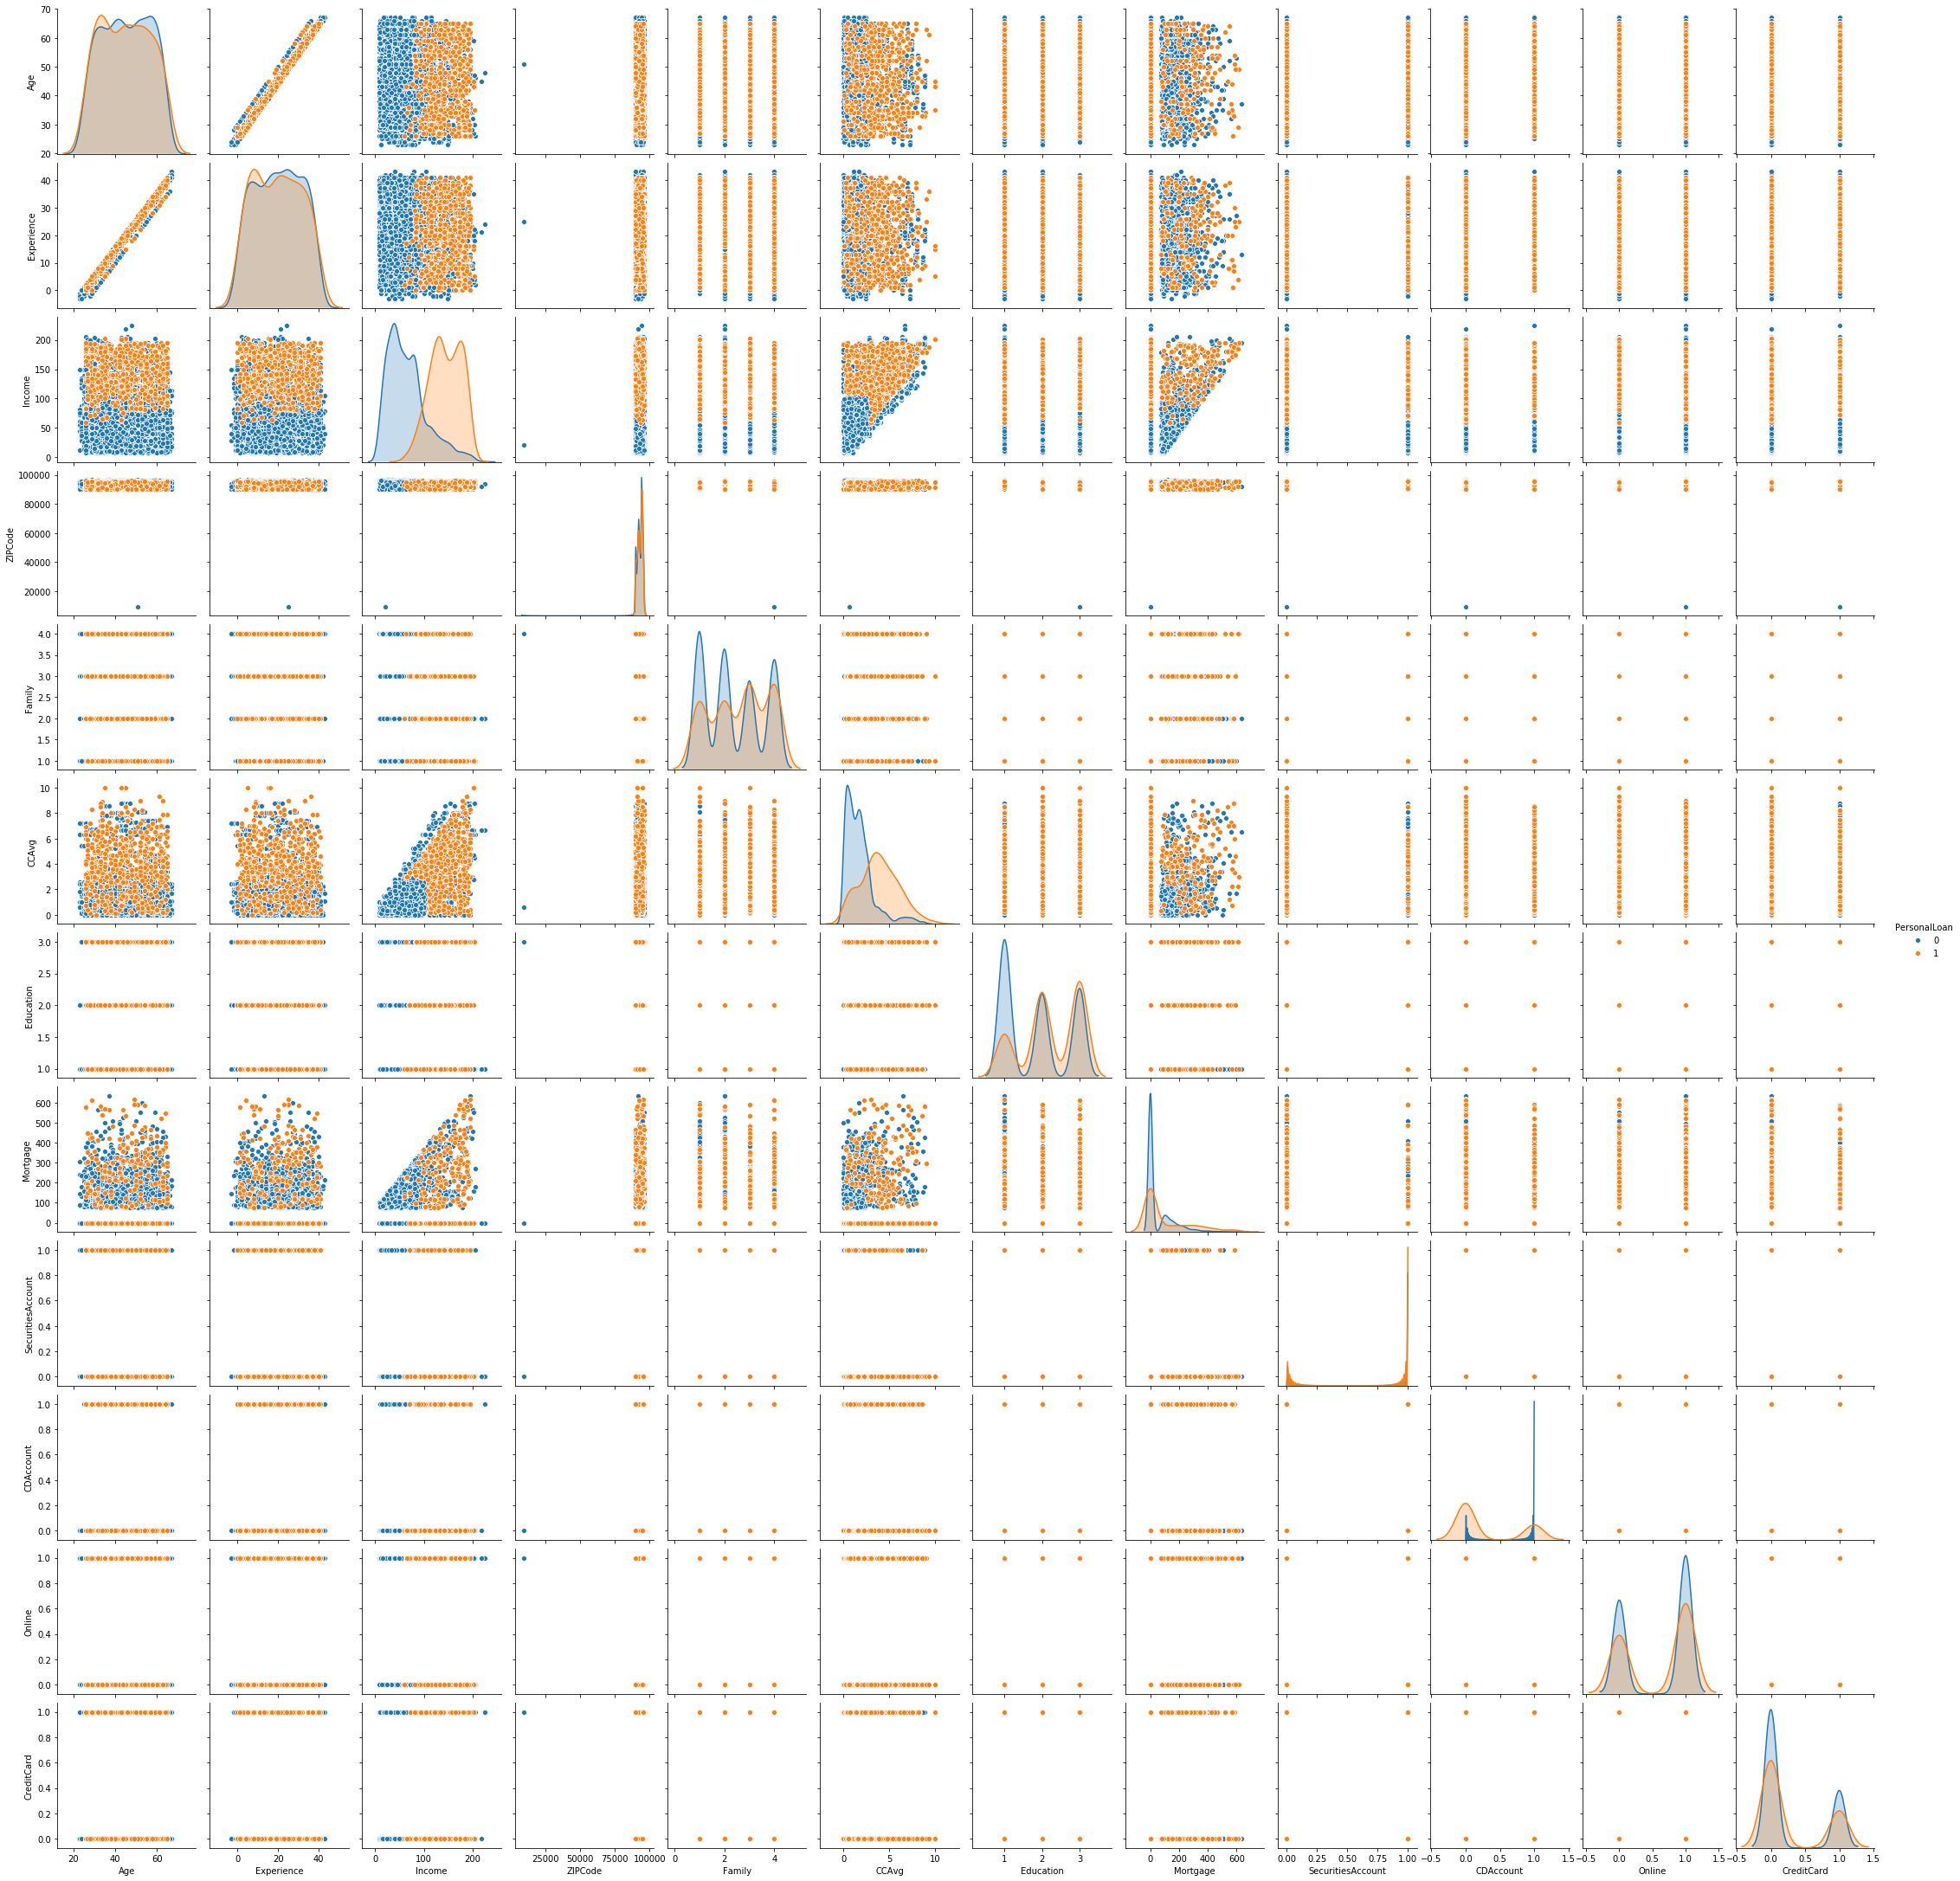

In [488]:
sns.pairplot(data.iloc[:,1:], hue = 'PersonalLoan')

#### From pairplots
###### Age and Experience have strong positive correlation.
###### ZIPCode has one outlier value which is less than 10K.
###### People those who are taking PersonalLoan that was offered to them in earlier campaign have a significantly different Income distribution then people who aren't taking the personal loan.
###### CCAvg i.e. Average spending on cards differs for people taking the personal loan and those who aren't taking the personal loan.
###### Family size is also an important factor for people considering taking personal loan from bank that was offered in earlier campaign and so is Mortgage, CD Account, Education (to some extent) among other variables.

In [489]:
# experience has negative values. Its need to be cleaned
negativeExp = data[data['Experience'] < 0]['Experience'].count()
print("Negative Experience values = ", negativeExp)

Negative Experience values =  52


In [490]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience
mylist

[90,
 227,
 316,
 452,
 525,
 537,
 541,
 577,
 584,
 598,
 650,
 671,
 687,
 794,
 890,
 910,
 1174,
 1429,
 1523,
 1906,
 2103,
 2431,
 2467,
 2546,
 2619,
 2718,
 2849,
 2877,
 2963,
 2981,
 3077,
 3131,
 3158,
 3280,
 3285,
 3293,
 3395,
 3426,
 3627,
 3797,
 3825,
 3888,
 3947,
 4016,
 4089,
 4117,
 4286,
 4412,
 4482,
 4515,
 4583,
 4958]

In [491]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].mean()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [492]:
# checking if there are records with negative experience
data[data['Experience'] < 0]['Experience'].count()

0

In [494]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243576,11.358635,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [495]:
avg_exp=data['Experience'].astype('float').mean(axis=0)
data["Experience"].replace(np.nan, avg_exp, inplace=True)

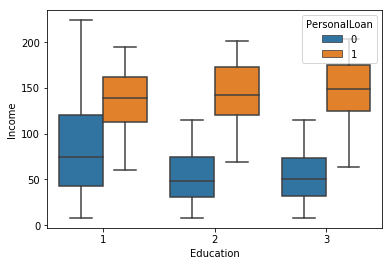

In [496]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

###### Inference : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

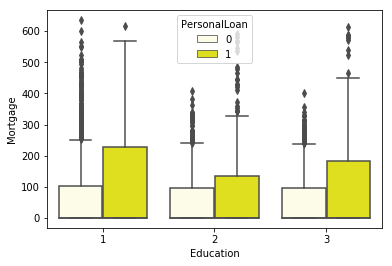

In [497]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,color='yellow')

###### Inference : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

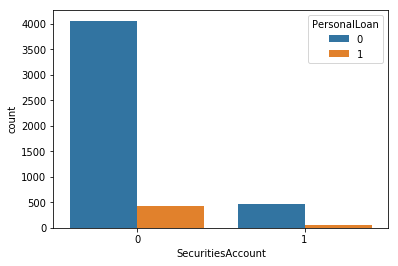

In [498]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

###### Inference : Majority of customers who does not have loan have securities account

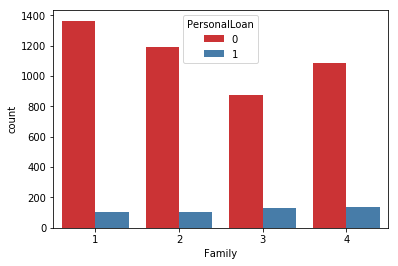

In [499]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')

###### Inference: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

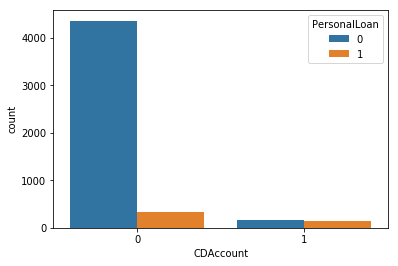

In [500]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')

###### Inference: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

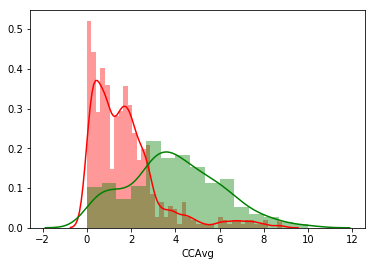

In [501]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'g')

###### Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0,0.5,'Age')

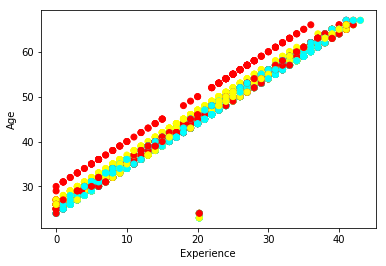

In [502]:
fig, ax = plt.subplots()
colors = {1:'cyan',2:'yellow',3:'red'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

###### Observation The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

Text(0.5,1,'Correlation Matrix')

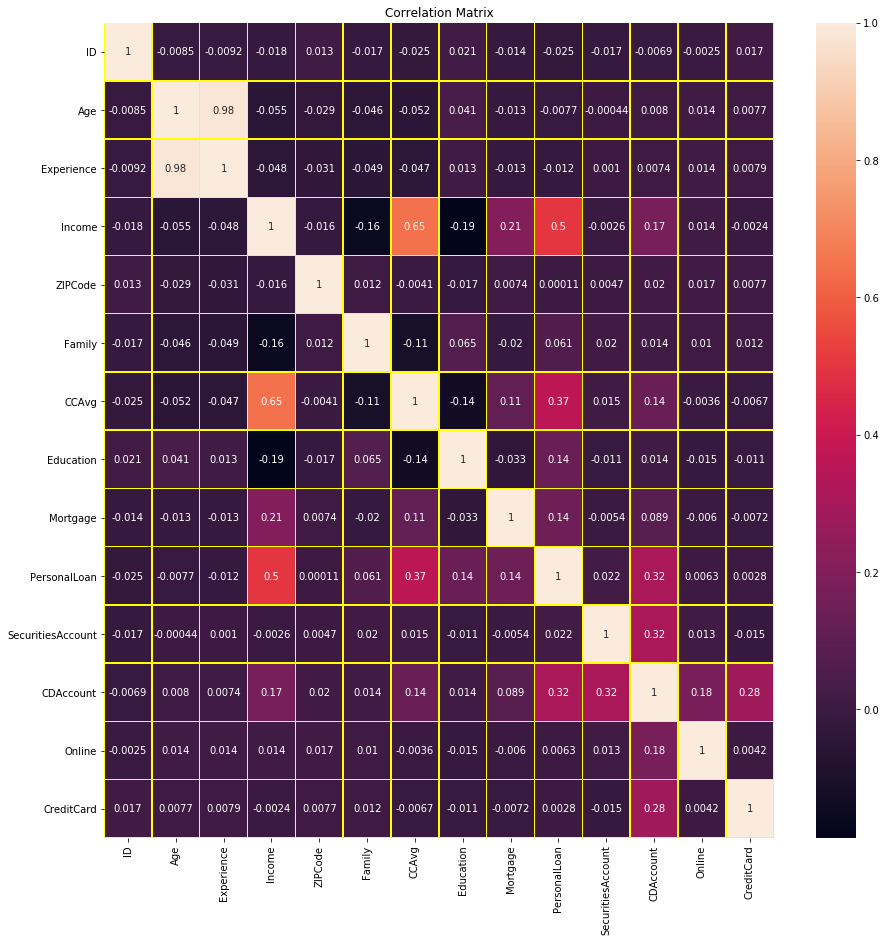

In [503]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(),linewidths=0.5,vmax=1.0, 
            linecolor='yellow', annot=True)
plt.title('Correlation Matrix')

In [504]:
# Filter for correlation value greater than 0.5
dcorr = data.drop('PersonalLoan', axis = 1).corr()
sort = dcorr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Age         Experience    0.983655
Experience  Age           0.983655
CCAvg       Income        0.645984
Income      CCAvg         0.645984
dtype: float64

In [505]:
# Absolute correlation of independent variables with 'Personal Loan' i.e. the target variable
absCorrwithDep = []
allVars = data.drop('PersonalLoan', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(data['PersonalLoan'].corr(data[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
3,Income,0.502462
6,CCAvg,0.366889
10,CDAccount,0.316355
8,Mortgage,0.142095
7,Education,0.136722
5,Family,0.061367
0,ID,0.0248012
9,SecuritiesAccount,0.0219539
2,Experience,0.0115054
1,Age,0.00772562


###### Observation- Correlation Matrix

Age and Experience are highly correlated with each other, as noted earlier during the EDA as well.
CCAvg and Income are moderately correlated with each other.
As we know that if a variable has a very low correlation with the target variable it's not going to be useful for the model prediction. While deciding whether which one out of Age and Experience to be dropped, we will drop Age column as it's correlation with the target variable is relatively less than Experience column.
Further dropping Online, ZIPCode and CreditCard since these columns also have relatively less correlation with the target column.

###### Split data into train and test

In [506]:
# dropping age column
data.drop(['Age', 'Online', 'CreditCard', 'ZIPCode'], axis = 1, inplace = True)
data.columns

Index(['ID', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount'],
      dtype='object')

In [507]:
# Separating dependent and independent variables
X = data.drop(['PersonalLoan'], axis = 1)
y = data['PersonalLoan']

display(X.describe().T, X.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Experience,5000.0,20.243576,11.325640,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0
CDAccount,5000.0,0.060400,0.238250,0.0,0.00,0.0,0.00,1.0


(5000, 9)

(5000,)

#### Logistic Regression¶

In [508]:
#### Splitting the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 9)

(1500, 9)

(3500,)

(1500,)

In [509]:
X_train

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount
1334,1335,22.000000,35,2,1.30,1,0,0,0
4768,4769,14.000000,39,1,2.00,2,0,0,0
65,66,35.000000,131,1,3.80,1,0,0,0
177,178,3.000000,65,4,1.80,2,244,0,0
4489,4490,13.000000,21,3,0.20,2,0,0,0
3889,3890,0.000000,19,1,0.10,2,121,0,0
1922,1923,15.000000,25,1,1.40,3,0,0,0
26,27,16.000000,83,4,0.20,3,0,0,0
2458,2459,20.000000,72,2,0.80,3,0,0,0
525,526,38.000000,79,2,2.80,1,179,0,0


In [510]:
data.isna().sum()

ID                   0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
dtype: int64

In [511]:
# LR model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

lr = LogisticRegression()
sc=StandardScaler()

scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
lr.fit(scaledX_train,y_train)
y_pred = lr.predict(scaledX_test)
print('Logistic Regression Scores\n')
print('LR accuracy for train set: {0:.3f}'.format(lr.score(scaledX_test,y_test)))
print('LR accuracy for test set: {0:.3f}'.format(lr.score(scaledX_train,y_train)))

# Classification Report
cr_lr = classification_report(y_test, y_pred)
print('\n{}'.format(cr_lr))

score_lr = score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc_lr = accuracy_score(y_test, y_pred)
print('\nAccuracy Score:\n', auc.round(3))


Logistic Regression Scores

LR accuracy for train set: 0.945
LR accuracy for test set: 0.949

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1351
          1       0.84      0.55      0.66       149

avg / total       0.94      0.94      0.94      1500


Confusion Matrix:
 [[1335   16]
 [  67   82]]

Accuracy Score:
 0.879


#### k-Nearest Neighbor Classifier

In [512]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 9)

(1500, 9)

(3500,)

(1500,)

In [513]:
# Test best k value 
neighbors = np.arange(1, 15)
train_accuracy = []
test_accuracy = []
data_f1score = []
cmatrix = []
classReport = []
score_knn = []
# Check different values of k  
for i, k in enumerate(neighbors):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    sc.fit(X_train)
    # Fit with knn
    scaledX_train = sc.transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn.fit(scaledX_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(scaledX_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(scaledX_test, y_test))
    # f1score
    y_predict = knn.predict(scaledX_test)
    data_f1score.append(f1_score(y_test,y_predict))
    #Confusion Matrix
    cmatrix.append(confusion_matrix(y_test, y_predict))
    #classification report
    classReport.append(classification_report(y_test, y_predict))
    score_knn.append(score(y_test, y_predict))
    
max_test_accuracy = np.max(test_accuracy)
index = test_accuracy.index(max_test_accuracy)
print("Best  K value = {} with score = {} and  accuracy = {} ".format(1+index ,data_f1score[index], max_test_accuracy)  )


Best  K value = 1 with score = 0.7803030303030304 and  accuracy = 0.9613333333333334 


In [514]:
# Classification Report
cr_knn = classReport[index]
print('\n{}'.format(cr_knn))
#print('Score : \n{}'.format(score_knn))
# Confusion Matrix
print("Confusion Matrix :\n", cmatrix[index])



             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1351
          1       0.90      0.69      0.78       149

avg / total       0.96      0.96      0.96      1500

Confusion Matrix :
 [[1339   12]
 [  46  103]]


In [515]:

d = {'k value':neighbors, 'test_accuracy': test_accuracy, 'f1score': data_f1score, 'ConfusionMatrix': cmatrix}
pd.DataFrame(data=d)

,k value,test_accuracy,f1score,ConfusionMatrix
0,1,0.961333,0.780303,"[[1339, 12], [46, 103]]"
1,2,0.946000,0.640000,"[[1347, 4], [77, 72]]"
2,3,0.958000,0.746988,"[[1344, 7], [56, 93]]"
3,4,0.949333,0.666667,"[[1348, 3], [73, 76]]"
4,5,0.954667,0.719008,"[[1345, 6], [62, 87]]"
5,6,0.946000,0.646288,"[[1345, 6], [75, 74]]"
6,7,0.950000,0.683544,"[[1344, 7], [68, 81]]"
7,8,0.948000,0.648649,"[[1350, 1], [77, 72]]"
8,9,0.950667,0.683761,"[[1346, 5], [69, 80]]"
9,10,0.947333,0.648889,"[[1348, 3], [76, 73]]"


#### Naive Bayes classifier

In [516]:
# Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Naive Bayes Classifier\n')
print('NB accuracy for train set: {0:.3f}'.format(gnb.score(X_train, y_train)))
print('NB accuracy for test set: {0:.3f}'.format(gnb.score(X_test, y_test)))

y_pred = gnb.predict(X_test)

# Classification Report
cr_gnb = classification_report(y_test, y_pred)
print('\n{}'.format(cr_gnb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

score_gnb= score(y_test, y_pred)
#print('\score_gnb Score:\n', score_gnb)
# Accuracy Score
auc_gnb = accuracy_score(y_test, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

Naive Bayes Classifier

NB accuracy for train set: 0.892
NB accuracy for test set: 0.879

             precision    recall  f1-score   support

          0       0.95      0.91      0.93      1351
          1       0.42      0.57      0.48       149

avg / total       0.90      0.88      0.89      1500


Confusion Matrix:
 [[1233  118]
 [  64   85]]

Accuracy Score:
 0.879


#### Conclusion and understanding of models results

Metrics that can be calculated from confusion matrix:

###### Precision would tell us cases where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.
###### Recall would tell us cases where actually the personal was accepted by the customer but we predicted it as not accepted.


###### For our Modelling it would be recall that would hold more importance then precision. So choosing recall and f1-score which is the harmonic mean of both precision and recall as evaluation metric, particularly for class 1.

In [517]:
#from sklearn.metrics import precision_recall_fscore_support as score

#### Comparing the recall f1 score and acuuracy of LR, KNN, Naives models

In [518]:
mod = ['LR','KNN','Naives']

recall_matrix =  [score_lr[1][1],score_knn[0][1][1],score_gnb[1][1]]
precision_matrix =  [score_lr[0][1],score_knn[0][0][1],score_gnb[0][1]]
f1_sc_matrix =  [score_lr[2][1],score_knn[0][2][1],score_gnb[2][1]]
acu_matrix = [auc_lr,max_test_accuracy ,auc_gnb]
d = {'Model': mod,'recall':recall_matrix, 'f1score': f1_sc_matrix, 'Accuracy': acu_matrix}

pd.DataFrame(data=d)

,Model,recall,f1score,Accuracy
0,LR,0.550336,0.663968,0.944667
1,KNN,0.691275,0.780303,0.961333
2,Naives,0.570470,0.482955,0.878667


###### It can be seen that k-Nearest Neighbor gives a better recall (69%), f1-score (78%) and Accuracy (96.1%) against others. 

###### k-NN performed better because of following reasons:
Non-parametric algorithm which means there are no assumptions to be met to implement k-NN. Parametric models like logistic regression has lots of assumptions to be met by data before it can be implemented which is not the case with k-NN.

k-NN is a memory-based approach that is the classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use.

k-NN works well with small number of input variables which in our case after dropping irrelevant were 8.

# END